# The Future of Software industry: A look into the current trends

Softwares are developing at a rapid rate and to cope up with this enormous update demand the software developers also need to develop. And to know about the future of This software we must know the conditions of today's developers. This dataset contains data in various fields for a developer. let us see what we can extract out from this dataset. 

This is a vast dataset and we will work only on the data of developers for now. To start with i will import all the required libraries that i will be needing to work with this dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS
import collections as cl
from datetime import datetime

### The above Librarys are used as because.

- numpy and pandas to work with the Dataset.
- seaborn for Visualization of the data.
- tqdm to track the progression of the loops.
- matplotlib to plot graphs.
- wordcloud to generate Wordclouds.
- DateTime to Print today's Date

Throughout this Code, I will try to find out the answer to the following questions.

### Questions!

- How many Developers are writing code for opensource?
- How much money do the Developers get throughout the globe?
- How much are the Developers satisfied with their jobs throughout the globe?
- What id the relation between the age of a developer and his work?
- What are the social media sites that the developer uses?
- What are the OS platform that the developers use to code and what OS he wants to use in Future?
- What are the Database Servers that the Developers use to While coding and what Database Servers he wants to use in Future?
- What are the WebFrames that the Developers uses and what WebFrame he wants to use in Future?
- Which type of work location is preferred by the Developers?

In [2]:
data = pd.read_csv('/kaggle/input/stack-overflow-developer-survey-results-2019/survey_results_public.csv')

In [3]:
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

#### For this Analysis processes, we will be needing a few of the columns of this dataset, Hense we will extract only the required data.

In [5]:
data.drop(columns={'Respondent','Hobbyist','Employment','Student','EdLevel','UndergradMajor','EduOther','OrgSize','DevType','YearsCode','Age1stCode','YearsCodePro','JobSat','MgrIdiot','MgrMoney','MgrWant','JobSeek','LastHireDate','LastInt','FizzBuzz','JobFactors','ResumeUpdate','CurrencySymbol','CurrencyDesc','CompTotal','CompFreq','WorkPlan','WorkChallenge','WorkRemote','ImpSyn','CodeRev','CodeRevHrs','UnitTests','PurchaseHow','PurchaseWhat','MiscTechWorkedWith','MiscTechDesireNextYear','DevEnviron','OpSys','Containers','BlockchainOrg','BlockchainIs','BetterLife','ITperson','OffOn','Extraversion','ScreenName','SOVisit1st','SOVisitFreq','SOVisitTo','SOFindAnswer','SOTimeSaved','SOHowMuchTime','SOAccount','SOPartFreq','SOJobs','EntTeams','SOComm','WelcomeChange','OpenSource','SONewContent','Trans','Sexuality','Ethnicity','Dependents','SurveyLength','SurveyEase'},inplace = True)

In [6]:
data.head()

,MainBranch,OpenSourcer,Country,CareerSat,ConvertedComp,WorkWeekHrs,WorkLoc,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,SocialMedia,Age,Gender
0,I am a student who is learning to code,Never,United Kingdom,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Twitter,14.0,Man
1,I am a student who is learning to code,Less than once per year,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,Instagram,19.0,Man
2,"I am not primarily a developer, but I write co...",Never,Thailand,Slightly satisfied,8820.0,40.0,Home,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,NaN,Other(s):,Reddit,28.0,Man
3,I am a developer by profession,Never,United States,Very satisfied,61000.0,80.0,Home,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,Reddit,22.0,Man
4,I am a developer by profession,Once a month or more often,Ukraine,Very dissatisfied,NaN,55.0,Office,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack,Django;Express;Flask;jQuery;React.js;Spring,Flask;jQuery;React.js;Spring,Facebook,30.0,Man


In [7]:
data.shape

(88883, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 18 columns):
MainBranch                88331 non-null object
OpenSourcer               88883 non-null object
Country                   88751 non-null object
CareerSat                 72847 non-null object
ConvertedComp             55823 non-null float64
WorkWeekHrs               64503 non-null float64
WorkLoc                   70055 non-null object
LanguageWorkedWith        87569 non-null object
LanguageDesireNextYear    84088 non-null object
DatabaseWorkedWith        76026 non-null object
DatabaseDesireNextYear    69147 non-null object
PlatformWorkedWith        80714 non-null object
PlatformDesireNextYear    77443 non-null object
WebFrameWorkedWith        65022 non-null object
WebFrameDesireNextYear    62944 non-null object
SocialMedia               84437 non-null object
Age                       79210 non-null float64
Gender                    85406 non-null object
dtypes: float64(3), obje

In [9]:
data.describe()

,ConvertedComp,WorkWeekHrs,Age
count,5.582300e+04,64503.000000,79210.000000
mean,1.271107e+05,42.127197,30.336699
std,2.841523e+05,37.287610,9.178390
min,0.000000e+00,1.000000,1.000000
25%,2.577750e+04,40.000000,24.000000
50%,5.728700e+04,40.000000,29.000000
75%,1.000000e+05,44.750000,35.000000
max,2.000000e+06,4850.000000,99.000000


With an overall overview of the data, it is clear that there are various incompleteness with the data and they are as follows.

### Assessing The Data

Type Convertion
- MainBranch to Category type
- OpenSourcer to Category type as 'Yes' or 'No'.
- CareerSat to category type as this contain only 5 type of string.
- WorkLoc to Category type as 'Ofice' or 'Home'.
- Age to Integer type as age is alwees a whole number.
- Gender to Category type as 'Male' or 'Female'

Quantity of incompleteness issue(almost every column contains empty data so we will try to fill them)
- MainBranch Will remove all the empty data as Non-Developer.
- Country We don't have other option as to remove the entry row without Country column.
- CareerSat We will take a meddle value for empty entry as all satisfied will comment on their satisfaction.
- WorkWeekHrs to not disturb the observation we will replace the empty entry with mean of that column.
- Gender we will take the empty entry as Transgender as they sometimes do not state their Gender.

### Cleaning The Data.

So now we know the datatypes of the columns and hence now we will be converting them to their required data tyes. 

#### Let's Start with MainBranch to Category type and from MainBranch we will remove all the empty data as Student.

In [10]:
data['MainBranch'].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

In [11]:
MainBranch = []
for i in data['MainBranch']:
    if i == 'I am a developer by profession':
        MainBranch.append('Developer')
    elif i == 'I am a student who is learning to code':
        MainBranch.append('Student')
    elif i == 'I am not primarily a developer, but I write code sometimes as part of my work':
        MainBranch.append('Semi_Developer')
    elif i == 'I code primarily as a hobby':
        MainBranch.append('Hobby') 
    elif i == 'I used to be a developer by profession, but no longer am':
        MainBranch.append('Ex_Developer')
    else:
        MainBranch.append('Student')
data['MainBranch'] = MainBranch
data['MainBranch'] = data['MainBranch'].astype('category',inplace=True)

#### Next is OpenSourcer to Category type as 'Yes' or 'No'.

In [12]:
data['OpenSourcer'].value_counts()

Never                                                 32295
Less than once per year                               24972
Less than once a month but more than once per year    20561
Once a month or more often                            11055
Name: OpenSourcer, dtype: int64

In [13]:
OpenSourcer = []
for i in data['OpenSourcer']:
    if (i == 'Never' ) or (i=='Less than once per year') or (i==''):
        OpenSourcer.append('No')
    else:
        OpenSourcer.append('Yes')
data['OpenSourcer'] = OpenSourcer
data['OpenSourcer'] = data['OpenSourcer'].astype('category')

#### Next we will convert CareerSat to integer type as rating out of 5.And for empty value CareerSat we will take a meddle value (3).

In [14]:
data['CareerSat'].value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

In [15]:
data['CareerSat'] = data['CareerSat'].astype('category')

#### Next we will convert WorkLoc to Category type as 'Ofice' or 'Home' and we will consider Home as an empty entry as i fill like all the Office people comment their interest.

In [16]:
data['WorkLoc'].value_counts()

Office                                            40592
Home                                              23278
Other place, such as a coworking space or cafe     6185
Name: WorkLoc, dtype: int64

In [17]:
WorkLoc = []
for i in data['WorkLoc']:
    if i == 'Office':
        WorkLoc.append(i)
    else:
        WorkLoc.append('Home')
data['WorkLoc'] = WorkLoc
data['WorkLoc'] = data['WorkLoc'].astype('category')

#### Next we will convet Age to Integer type as age is alwees a whole number and not to disturb the observation.

In [18]:
Age = []
count = 0
for i in data['Age']:
    try:
        Age.append(int(i))
    except:
        Age.append(i)
        count += 1
data['Age'] = Age

In [19]:
count

9673

#### Now it is time to convert Gender to Category type as 'Male' or 'Female' And we will take the empty entry as Transgender as they sometimes do not state their Gender.

In [20]:
data['Gender'].value_counts()

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [21]:
Gender = []
for i in tqdm(data['Gender']):
    if (i=='Man') or (i== 'Man;Non-binary, genderqueer, or gender non-conforming'):
        Gender.append('Male')
    elif (i=='Woman') or (i=='Woman;Non-binary, genderqueer, or gender non-conforming') or (i=='Woman;Man;Non-binary, genderqueer, or gender non-conforming'):
        Gender.append('Female')
    else:
        Gender.append('Transgender')
data['Gender'] = Gender
data['Gender'] = data['Gender'].astype('category')

100%|██████████| 88883/88883 [00:00<00:00, 1434953.38it/s]


#### Country We don't have other option as to remove the entry row without Country column. Although it is a very little portion of the dataset.

In [22]:
Country = data['Country'].value_counts().index
filters = []
for i in tqdm(data['Country']):
    filters.append(i in Country)
    
data = data[filters]

100%|██████████| 88883/88883 [00:00<00:00, 842813.01it/s]


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88751 entries, 0 to 88882
Data columns (total 18 columns):
MainBranch                88751 non-null category
OpenSourcer               88751 non-null category
Country                   88751 non-null object
CareerSat                 72847 non-null category
ConvertedComp             55823 non-null float64
WorkWeekHrs               64503 non-null float64
WorkLoc                   88751 non-null category
LanguageWorkedWith        87569 non-null object
LanguageDesireNextYear    84088 non-null object
DatabaseWorkedWith        76026 non-null object
DatabaseDesireNextYear    69147 non-null object
PlatformWorkedWith        80714 non-null object
PlatformDesireNextYear    77443 non-null object
WebFrameWorkedWith        65022 non-null object
WebFrameDesireNextYear    62944 non-null object
SocialMedia               84437 non-null object
Age                       79210 non-null float64
Gender                    88751 non-null category
dtypes: catego

In [24]:
data.shape

(88751, 18)

### 1.How many Developers are writing code for opensource?

#### To answer this question i will plot a graph for all types of coder vs developer or not.

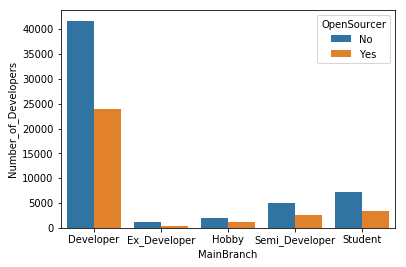

In [25]:
haha = data.groupby('MainBranch')['OpenSourcer'].value_counts()
haha = haha.to_frame('Number_of_Developers')
haha = haha.reset_index()
sns.barplot(x='MainBranch',y='Number_of_Developers',hue='OpenSourcer',data=haha)

### 2.How much money do the Developers get throughout the globe?

#### To answer this question i will plot a bar graph between the name of the country vs average salary they get in USD

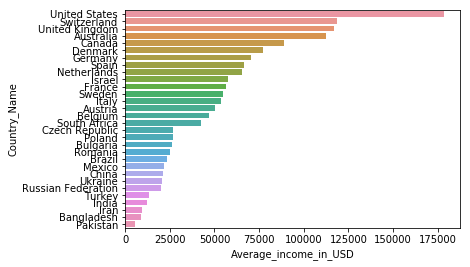

In [26]:
num = data['Country'].value_counts()[:30]
total = data.groupby('Country')['ConvertedComp'].sum()
data_plot1 = (total/num).sort_values(ascending=False)[:30]
data_plot = data_plot1.reset_index()
data_plot.rename(columns={0:'Average_income_in_USD','index':'Country_Name'},inplace=True)
sns.barplot(y='Country_Name',x='Average_income_in_USD',data = data_plot)

### 3. How much are the Developers satisfied with their jobs throughout the globe?

#### To answer this question we will plot a bar-graph between career satisfaction and number of vote in that section.

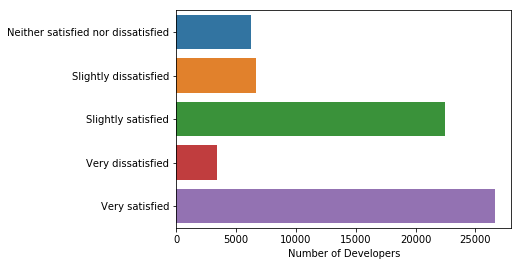

In [27]:
data_dev = data[data['MainBranch']=='Developer']
plot_data=data_dev['CareerSat'].value_counts().sort_index().reset_index()
plot_data.rename(columns={'index':'','CareerSat':'Number of Developers'},inplace=True)
sns.barplot(y='',x='Number of Developers',data=plot_data)

### 4. What id the relation between the age of a developer and his work?

#### To answer this question i will plot a line graph between age and it's frequency.

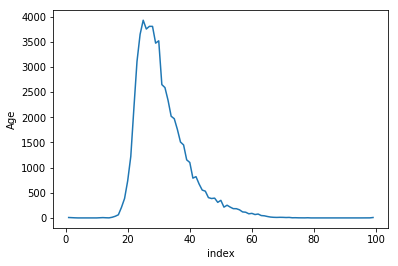

In [28]:
plot_data = data_dev['Age'].value_counts().sort_index().reset_index()
sns.lineplot(x='index',y='Age',data=plot_data)

### 5.What are the social media sites that the developer uses?

#### To answer this question i will plot a bargraph i will plot a between name of social media and their frequency.

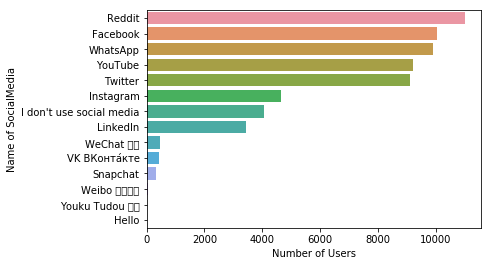

In [29]:
data_plot = data_dev['SocialMedia'].value_counts().reset_index()
data_plot.rename(columns={'index':'Name of SocialMedia','SocialMedia':'Number of Users'},inplace=True)
sns.barplot(x='Number of Users',y='Name of SocialMedia',data=data_plot)

###  6.What are the OS platform that the developers use to code and what OS he wants to use in Future.

### 7.What are the Database Servers that the Developers use to While coding and what Database Servers he wants to use in Future?

### 8.What are the WebFrames that the Developers uses and what WebFrame he wants to use in Future?

#### To answer the above 3 question i will draw some wordcloud ans save them.

In [30]:
def generate_word_column_for_the_column_of(column,color):
    column_name = column
    os_now_all_word = ''
    for i in data_dev[column_name]:
        try:
            a=i.split(';')
            for j in a:
                os_now_all_word+=' '+ j
        except:
            a=5

    cloud = WordCloud(background_color=color,max_font_size=250,width=960, height=1080).generate(os_now_all_word)

    cloud.to_file(column_name + '.png')
    plt.imshow(cloud)

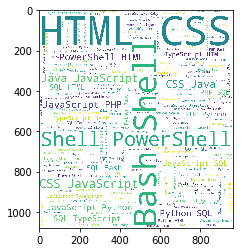

In [31]:
generate_word_column_for_the_column_of('LanguageWorkedWith','white')

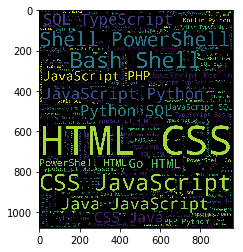

In [32]:
generate_word_column_for_the_column_of('LanguageDesireNextYear','black')

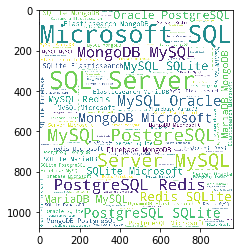

In [33]:
generate_word_column_for_the_column_of('DatabaseWorkedWith','white')

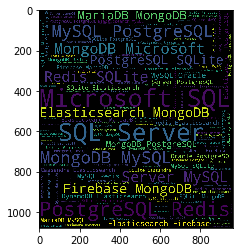

In [34]:
generate_word_column_for_the_column_of('DatabaseDesireNextYear','black')

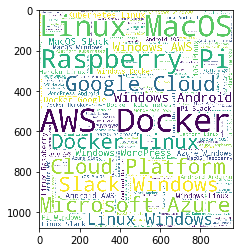

In [35]:
generate_word_column_for_the_column_of('PlatformWorkedWith','white')

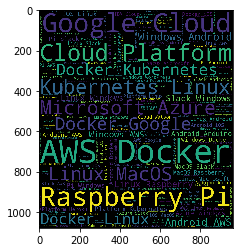

In [36]:
generate_word_column_for_the_column_of('PlatformDesireNextYear','black')

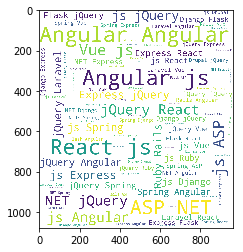

In [37]:
generate_word_column_for_the_column_of('WebFrameWorkedWith','white')

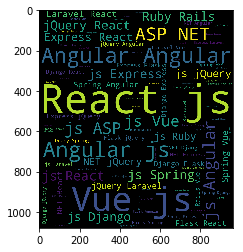

In [38]:
generate_word_column_for_the_column_of('WebFrameDesireNextYear','black')

### 9.Which type of work location is preferred by the Developers?

#### To answer this question i will plot a pie chat of frequency of office and home candidates.

([<matplotlib.patches.Wedge at 0x7f1ae5811c18>,
 [Text(-0.1994876782513622, 1.0817599854985769, 'Office'),
  Text(0.1994876782513623, -1.0817599854985769, 'Home')],
 [Text(-0.10881146086437937, 0.5900509011810419, '55.8%'),
  Text(0.10881146086437941, -0.5900509011810419, '44.2%')])

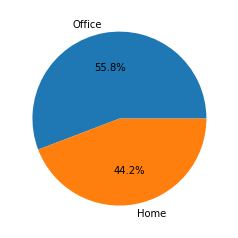

In [39]:
data_plot_number = data_dev['WorkLoc'].value_counts().values
data_plot_name = data_dev['WorkLoc'].value_counts().index 
plt.pie(data_plot_number,labels=data_plot_name,autopct='%1.1f%%',)

In [40]:
print(datetime.now())

2019-09-13 10:46:02.942595


# by MD SHAKIB MONDAL
# email : - sakibmondal7@gmail.com